# Project: Investigation of firearm sales in the United States

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limits">Limitations</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Using data provided by the **FBI's National Criminal Instant Background Check System** (NICS), and the **US Census** fact sheet I intend to investigate trends in gun sales both at a national level, and at a state level.

1. What is the overall trend of gun purchases at a national level over time?
2. Which state has the highest firearm sales per capita for the given time period (2016)?

<a id='wrangling'></a>
## Data Wrangling

The first thing we do in any data exploration and analysis is to take a look at the data and see what needs to be done to make it more suitable for answering the questions we've proposed. This may mean getting rid of data that isn't relevant, or isn't complete enough to be useful, or transforming the data we have into datatypes that will be more useful for analysis, or filling in missing values for needed information among other processes.

First thing's first though, taking a look at the data itself and seeing what we're working with.

### General Properties

In [1]:
# initial imports to set up the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load the data files
gun_data_df = pd.read_excel('data/gun_data.xlsx')
us_census_df = pd.read_csv('data/U.S. Census Data.csv')

In [2]:
# Print the first five rows to get an overview of what the data looks like
gun_data_df.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0       317    0.0             15.0   ...               0.0              0.0   
1       160    0.0              5.0   ...               0.0              0.0   
2       631    0.0             13.0   ...               0.0              0.0   
3       366   51.0             12.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [3]:
# Print the last 5 rows
gun_data_df.tail()

month          state  permit  permit_recheck  handgun  long_gun  \
12480  1998-11       Virginia     0.0             NaN     14.0       2.0   
12481  1998-11     Washington     1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia     3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin     0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming     8.0             NaN     45.0      49.0   

       other  multiple  admin  prepawn_handgun   ...    returned_other  \
12480    NaN         8    0.0              NaN   ...               NaN   
12481    NaN         8    1.0              NaN   ...               NaN   
12482    NaN         5    0.0              NaN   ...               NaN   
12483    NaN         2    0.0              NaN   ...               NaN   
12484    NaN         5    0.0              NaN   ...               NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12480                        NaN                     NaN      24  
12481                        NaN                     NaN     361  
12482                        NaN                     NaN     408  
12483                        NaN                     NaN     241  
12484                        NaN                     NaN     107  

[5 rows x 27 columns]

There are so many columns in this data set we can't even display them all! Also, looking at the tail of the dataset we see there are a lot of NaNs, or *Not a Number*s. We'll definitely have to deal with those at some point, but first let's just get a list of all the columns and figure out what we need to answer the question.

In [4]:
gun_data_df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

Since our question only deals with gun sales (not rentals, returns, permits, etc) the only columns that are relevant to our investiation are: `month`, `state`, `handgun`, `long_gun`, `other`, `multiple`, `private_sale_handgun`, `private_sale_long_gun`, and `private_sale_other`, so we'll drop the other columns to make things easier to work with.

In [5]:
gun_data_df.drop(columns=['permit', 'permit_recheck', 'admin', 'prepawn_handgun', 
                          'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 
                          'redemption_long_gun', 'redemption_other', 'returned_handgun', 
                          'returned_long_gun', 'returned_other', 'rentals_handgun', 
                          'rentals_long_gun', 'return_to_seller_handgun','return_to_seller_long_gun',
                          'return_to_seller_other', 'totals'], inplace=True)

gun_data_df.head()

month       state  handgun  long_gun   other  multiple  \
0  2017-09     Alabama   5734.0    6320.0   221.0       317   
1  2017-09      Alaska   2320.0    2930.0   219.0       160   
2  2017-09     Arizona  11063.0    7946.0   920.0       631   
3  2017-09    Arkansas   4347.0    6063.0   165.0       366   
4  2017-09  California  37165.0   24581.0  2984.0         0   

   private_sale_handgun  private_sale_long_gun  private_sale_other  
0                   9.0                   16.0                 3.0  
1                  17.0                   24.0                 1.0  
2                  38.0                   12.0                 2.0  
3                  13.0                   23.0                 0.0  
4                   0.0                    0.0                 0.0

That takes care of the columns. Now let's see what each column is currently being stored as.

In [6]:
gun_data_df.dtypes

month                     object
state                     object
handgun                  float64
long_gun                 float64
other                    float64
multiple                   int64
private_sale_handgun     float64
private_sale_long_gun    float64
private_sale_other       float64
dtype: object

Everything looks fine except for the `month` column. An `object` is also known as a `string`, and it's just plain text. If we first convert the column into a `datetime` datatype, then set it as our dataframe's index we'll be able to aggregate the data by year/month, or plot it over time easily.

In [7]:
# recast the month column
gun_data_df.month = pd.to_datetime(gun_data_df.month)

# Set the index to the 'month' column
gun_data_df.index = gun_data_df.month

# Rename the index
gun_data_df.index.name = 'date'

# Drop the 'month' column as we no longer need it
gun_data_df.drop(columns=['month'], inplace=True)

gun_data_df.head()

state  handgun  long_gun   other  multiple  \
date                                                          
2017-09-01     Alabama   5734.0    6320.0   221.0       317   
2017-09-01      Alaska   2320.0    2930.0   219.0       160   
2017-09-01     Arizona  11063.0    7946.0   920.0       631   
2017-09-01    Arkansas   4347.0    6063.0   165.0       366   
2017-09-01  California  37165.0   24581.0  2984.0         0   

            private_sale_handgun  private_sale_long_gun  private_sale_other  
date                                                                         
2017-09-01                   9.0                   16.0                 3.0  
2017-09-01                  17.0                   24.0                 1.0  
2017-09-01                  38.0                   12.0                 2.0  
2017-09-01                  13.0                   23.0                 0.0  
2017-09-01                   0.0                    0.0                 0.0

One last bit of clean up; Since our dataset includes partial years for the first and last year, let's clip those off and only work with years that were complete.

In [8]:
gun_data_df = gun_data_df[(gun_data_df.index.year < 2017) & (gun_data_df.index.year > 1998)]

##### Dealing with missing values

Now that we've trimmed the dataset down to what we need to answer the question, let's deal with those `NaN`s. First let's see which columns are most effected

In [9]:
gun_data_df.count()

state                    11880
handgun                  11861
long_gun                 11862
other                     5005
multiple                 11880
private_sale_handgun      2255
private_sale_long_gun     2255
private_sale_other        2255
dtype: int64

So there's quite a bit of missing data in the `private_sale_*` and `other` columns, but this was due to those not being categories being tracked in the earlier periods of time. This being the case we'll just fill in those blanks with 0's

In [10]:
gun_data_df.fillna(0, inplace=True)
gun_data_df.count()

state                    11880
handgun                  11880
long_gun                 11880
other                    11880
multiple                 11880
private_sale_handgun     11880
private_sale_long_gun    11880
private_sale_other       11880
dtype: int64

One more thing we can do now to save ourselves some time in the exploration phase it to create a new `total_sales` column that is the sum of the other numerical columns.

In [11]:
gun_data_df['total_sales'] = gun_data_df.sum(axis=1)
gun_data_df.head()

state  handgun  long_gun    other  multiple  \
date                                                           
2016-12-01     Alabama  13733.0   17519.0    376.0       533   
2016-12-01      Alaska   4087.0    3698.0    243.0       191   
2016-12-01     Arizona  18024.0   13785.0   1180.0       703   
2016-12-01    Arkansas   9192.0   13433.0    277.0       385   
2016-12-01  California  63649.0   93224.0  77929.0         0   

            private_sale_handgun  private_sale_long_gun  private_sale_other  \
date                                                                          
2016-12-01                   2.0                    2.0                 1.0   
2016-12-01                   0.0                    0.0                 0.0   
2016-12-01                   2.0                    2.0                 0.0   
2016-12-01                   2.0                    7.0                 0.0   
2016-12-01                   0.0                    0.0                 0.0   

            total_sales  
date                     
2016-12-01      32166.0  
2016-12-01       8219.0  
2016-12-01      33696.0  
2016-12-01      23296.0  
2016-12-01     234802.0

That takes care of the `gun_data_df`. 

----

Now let's take a look at the **US Census** data to see what needs to be cleaned up there.

In [12]:
us_census_df.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

    ...    South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0   ...          865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1   ...          814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2   ...           0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3   ...          814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4   ...           0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

Ah, so this is a "Fact Table" where each row lists a single fact with each column representing the value for each state. Let's list just the `Fact` column to see what facts are available

In [13]:
for row in us_census_df['Fact']:
    print(row)

Population estimates, July 1, 2016,  (V2016)
Population estimates base, April 1, 2010,  (V2016)
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
Population, Census, April 1, 2010
Persons under 5 years, percent, July 1, 2016,  (V2016)
Persons under 5 years, percent, April 1, 2010
Persons under 18 years, percent, July 1, 2016,  (V2016)
Persons under 18 years, percent, April 1, 2010
Persons 65 years and over, percent,  July 1, 2016,  (V2016)
Persons 65 years and over, percent, April 1, 2010
Female persons, percent,  July 1, 2016,  (V2016)
Female persons, percent, April 1, 2010
White alone, percent, July 1, 2016,  (V2016)
Black or African American alone, percent, July 1, 2016,  (V2016)
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
Asian alone, percent, July 1, 2016,  (V2016)
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
Two or More Races, percent, July 1, 2016,  (V2016)
Hispanic or Latino, p

Wow, that's a lot of facts! For the purpose of this investigation it looks like the only row in the dataframe we need is the *Population estimates, July 1, 2016,  (V2016)* row. First we'll need to drop the `Fact Note` and `Fact` columns before selecting only the first row. Doing this will convert our dataframe to a series with the `state` as the index, and then finally, convert all the state values to a numeric value. This will give us a Pandas `series` object we can later use in our per capita calculations.

In [14]:
# drop the 'Fact' and `Fact Note` columns
us_census_df.drop(columns=['Fact', 'Fact Note'], inplace=True)

# drop all the rows not relevant to our investigation
us_census_df = us_census_df.iloc[0]

# rename the index from 0 (the previous index value) to what the value represents, the 'popultation' of each state
us_census_df.name = 'population'

us_census_df.head()

Alabama        4,863,300
Alaska           741,894
Arizona        6,931,071
Arkansas       2,988,248
California    39,250,017
Name: population, dtype: object

That looks great except for one thing. The values in the series are currently an `object`. Before we can use the values in mathmatical formulas we'll have to convert them to a numeric datatype.

##### Converting datatypes

In [15]:
# Since Panads `.to_numeric()` method cannot handle string numbers with commas first we'll remove those
us_census_df = us_census_df.apply(lambda state: state.replace(',',''))

# next we'll convert the string values to integers
us_census_df = pd.to_numeric(us_census_df, downcast='integer')

# now to check our work
us_census_df.head()

Alabama        4863300
Alaska          741894
Arizona        6931071
Arkansas       2988248
California    39250017
Name: population, dtype: int32

That takes care of the cleaning and preparing our data for analysis. 

<a id='eda'></a>
## Exploratory Data Analysis

### What is the overall trend of gun purchases at a national level over time?

Since we're only interested in the average total sales for each year, that'll be the column we plot

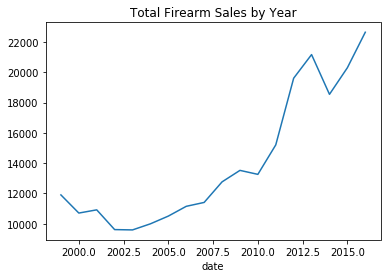

In [16]:
gun_data_df.groupby(gun_data_df.index.year)['total_sales'].mean().plot(title='Total Firearm Sales by Year')

From this data we see there is a clear upward trend in firearm sales over the time period of our sample. In 2002 nationwide firearm sales had at an average of around 10,000 sales per month, but rose to over 22,000 sales by 2015.

#### And now just because I'm curious, what are the plots for the two major categories:

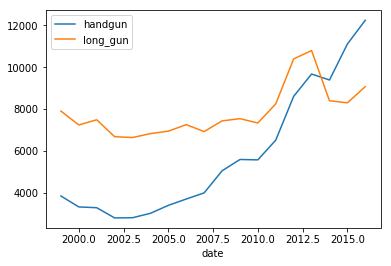

In [17]:
gun_data_df.groupby(gun_data_df.index.year)['handgun', 'long_gun'].mean().plot()

That's interesting, something happened around 2012-2013 that cause long gun sales to drop. Without any additional data there's no way to know what might have been the cause, but it's not really relevant to the question we proposed either, just something that might warrant a separate investigation.

### Which state has the highest firearm sales per capita for the given time period (2016)?

The first thing we'll need to do to answer this question is narrow our firarm sales dataset to only the year 2016.

In [18]:
# Create a new dataframe that is just the data for the year 2016
sampled_df = gun_data_df[gun_data_df.index.year == 2016]

sampled_df.index.unique()

DatetimeIndex(['2016-12-01', '2016-11-01', '2016-10-01', '2016-09-01',
               '2016-08-01', '2016-07-01', '2016-06-01', '2016-05-01',
               '2016-04-01', '2016-03-01', '2016-02-01', '2016-01-01'],
              dtype='datetime64[ns]', name='date', freq=None)

Now we have a dataframe that has each states sales by month for the year 2016. Next we'll add each month up together by state to give us a table of each state and its firearm sales for 2016.

In [19]:
# Group up everything by state and get the sum values
sampled_df = sampled_df.groupby(sampled_df.state).sum()

sampled_df.head()

handgun  long_gun     other  multiple  private_sale_handgun  \
state                                                                      
Alabama     153123.0  121963.0    6104.0      6545                  72.0   
Alaska       37491.0   36887.0    2889.0      2316                  39.0   
Arizona     166784.0  108988.0   13122.0      7908                  76.0   
Arkansas     80244.0   82120.0    3059.0      4400                  72.0   
California  560355.0  554550.0  211707.0         0                   0.0   

            private_sale_long_gun  private_sale_other  total_sales  
state                                                               
Alabama                      65.0                 4.0     287876.0  
Alaska                       66.0                 1.0      79689.0  
Arizona                      56.0                11.0     296945.0  
Arkansas                     64.0                 6.0     169965.0  
California                    0.0                 0.0    1326612.0

And now let's plot the `total_sales` for each state in a simple bar graph.

In [20]:
# plot the total sales by state
sampled_df['total_sales'].plot(kind='bar',
                               figsize=(15,5),
                               title='Firearm sales for the year 2016 by state')

This chart shows us the total number of sales by state for the year 2016.  In it we can see California topped the country as the state with the most sales absolutely dwarfing a state like Georgia, where you'd think you'd see a lot more sales (it being a southern state), but this is an unfair way to view the data since a state like California has a much higher population than Georgia, thus more people to buy guns.

In [21]:
print(f"California:\t{us_census_df['California']}\nGeorgia:\t{us_census_df['Georgia']}")

California:	39250017
Georgia:	10310371


To account for this we need to know what the sales are per person living in the state that year. So let's take the second dataset we cleaned that has this information and attach it to the end of the sampled data. Because both datasets have the state name as an index, the two will join up state for state.

In [22]:
# add the state population from the us_census_df dataframe
sampled_df = sampled_df.join(us_census_df)
sampled_df.head()

handgun  long_gun     other  multiple  private_sale_handgun  \
state                                                                      
Alabama     153123.0  121963.0    6104.0      6545                  72.0   
Alaska       37491.0   36887.0    2889.0      2316                  39.0   
Arizona     166784.0  108988.0   13122.0      7908                  76.0   
Arkansas     80244.0   82120.0    3059.0      4400                  72.0   
California  560355.0  554550.0  211707.0         0                   0.0   

            private_sale_long_gun  private_sale_other  total_sales  population  
state                                                                           
Alabama                      65.0                 4.0     287876.0   4863300.0  
Alaska                       66.0                 1.0      79689.0    741894.0  
Arizona                      56.0                11.0     296945.0   6931071.0  
Arkansas                     64.0                 6.0     169965.0   2988248.0  
California                    0.0                 0.0    1326612.0  39250017.0

Perfect! Now let's do some simple math to get the number of sales per person in the state and store that in a new column we can use to plot

In [23]:
sampled_df['sales_per_capita'] = sampled_df.total_sales / sampled_df.population
sampled_df.sales_per_capita.sort_values(ascending=False)

state
Alaska                  0.107413
South Dakota            0.105615
West Virginia           0.099557
Montana                 0.095199
Wyoming                 0.087392
New Hampshire           0.086589
Missouri                0.083420
Tennessee               0.082005
Oklahoma                0.081809
Colorado                0.081709
Oregon                  0.078600
Maine                   0.075955
North Dakota            0.074354
Mississippi             0.074039
Indiana                 0.072759
Louisiana               0.070683
New Mexico              0.064293
Idaho                   0.063791
Vermont                 0.063020
Pennsylvania            0.062626
Wisconsin               0.061710
Virginia                0.061638
Alabama                 0.059194
Kentucky                0.058772
Ohio                    0.058476
Arkansas                0.056878
Kansas                  0.056594
Washington              0.056177
Minnesota               0.053082
Delaware                0.052979
Flor

Looks like there were a few states in the FBI data that weren't in the us_census dataframe, so let's go ahead and trim those off before plotting our chart

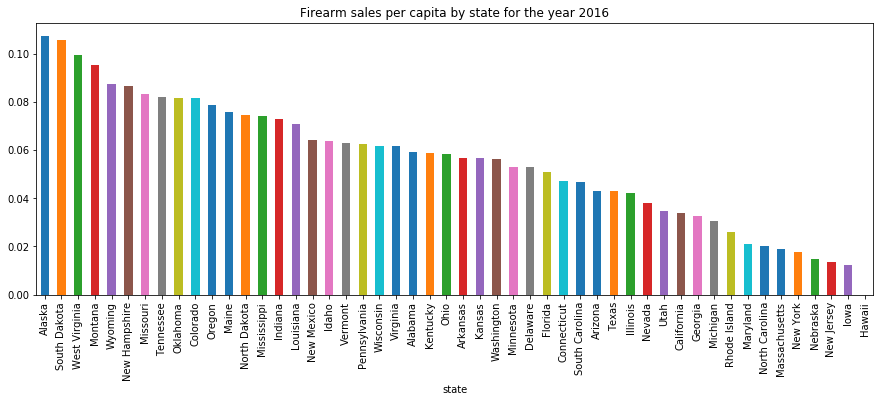

In [24]:
# dropping the states with NaNs
sampled_df.dropna(inplace=True)

# plot the chart based on the sales_per_capita column
sampled_df.sales_per_capita.sort_values(ascending=False).plot(kind='bar',
                                                         figsize=(15,5),
                                                         title='Firearm sales per capita by state for the year 2016')

Now we see the chart showing that per person `California` has much fewer sales than many other states. So even though `California` has the sum total highest amount of sales for the year 2016, a higher portion of the population in `Alaska` actually owns a firearm.

<a id='limits'></a>
## Limitations

The greatest challenge I experienced in this project was what's known in the gaming community as 'analysis paralysis'.  When working with data it can be an extremely daunting trying to figure out how to best approach the task to answer the question at hand. One of the best steps to help with this is trimming the data. Getting rid of everything that isn't necessary to answering the question proposed can be a useful first step. However, cutting away too much data can limit your ability to explore freely later on. This is always a balance each individual analyst must make for themselves.

<a id='conclusions'></a>
## Conclusions

##### What is the overall trend of gun purchases at a national level over time?
While it *appears* from the data that there is a trend of more firearms being sold each year than the previous, without having the corresponding data to know how the population has changed over that same period we can't conclusively that we as a nation are buying more guns.  It's possible that gun purchases have just increased with the population. Additionally, without data to cross-analyze we're unable to draw any correlations to the nature of what might have driven the changes.  We can definitely say that there are more guns being sold, which is an answer to the question we proposed, but it should be made with an asterisk due to the caveat.

##### Which state has the highest firearm sales per capita for the given time period (2016)?
For the year 2016 it looks like `Alaska` takes the award for most fireams sold per person, but just barely. By and large it appears as though the states with far more rurual area tend to have the highest penetration of firearm owning people. This makes sense logically as those would also be the places where activities like hunting would be more in line with social values of the people living there.